In [1]:
import uqtestfuns as uqtf
import matplotlib.pyplot as plt
import numpy as np

(prob-input:univariate-distributions:logitnormal)=
# Logit-Normal Distribution

The logit-normal distribution is a two-parameter continuous probability distribution.
A logit-normal random variable is a variable whose _logit_ is
a {ref}`normally distributed <prob-input:univariate-distributions:normal>` 
random variable.

```{admonition} Logit and logistic function

The logit function is the inverse cumulative distribution function of
the standard logistic distribution. It is defined as

$$
\mathrm{logit}(x) = \ln \frac{x}{1 - x}, \; x \in (0, 1).	
$$

The inverse of the logit function is called the _logistic function_
(it's, the cumulative distribution function of the standard logistic
distribution):

$$
\mathrm{logistic}(x) = \frac{1}{1 + e^{-x}}, \; x \in \mathbb{R}
$$

The range of the logistic function is $(0, 1)$.
```

The table below summarizes some important aspects of the distribution.

|                      |                                                                                                                                                                                                                                   |
|---------------------:|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         **Notation** | $X \sim \mathcal{N}_{\mathrm{logit}}(\mu, \sigma)$                                                                                                                                                                                |
|       **Parameters** | $\mu \in \mathbb{R}$                                                                                                                                                                                                              |
|                      | $\sigma > 0$                                                                                                                                                                                                                      |
|  **{term}`Support`** | $\mathcal{D}_X = (0, 1)$                                                                                                                                                                                                          |
|      **{term}`PDF`** | $f_X (x; \mu, \sigma) = \begin{cases} 0.0 & x \leq 0.0 \\ \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[ - \frac{1}{2} \left(\frac{\mathrm{logit}(x) - \mu}{\sigma} \right)^2 \right]} & x \in (0, 1) \\ 0.0 & x \geq 1.0 \end{cases}$ |
|      **{term}`CDF`** | $F_X (x; \mu, \sigma) = \begin{cases} 0.0 & x \leq 0.0 \\ \frac{1}{2} \left[ 1 + \mathrm{erf}\left( \frac{\mathrm{logit}(x) - \mu}{\sigma \sqrt{2}}\right) \right] & x \in (0, 1) \\ 1.0 & x \geq 1.0\\ \end{cases}$              |
|     **{term}`ICDF`** | $F^{-1}_X (x; \mu, \sigma) = \mathrm{logistic} \left(\mu + \sqrt{2} \, \sigma \, \mathrm{erf}^{-1}(2 x - 1) \right)$                                                                                                              |

```{note}
The parameters $\mu$ and $\sigma$ of a logit-normal distribution correspond
to the mean and standard deviation of the underlying normal distribution,
respectively.
```

The plots of probability density functions (PDFs),
sample histogram (of $5'000$ points),
cumulative distribution functions (CDFs),
and inverse cumulative distribution functions (ICDFs) for different parameter
values are shown below.

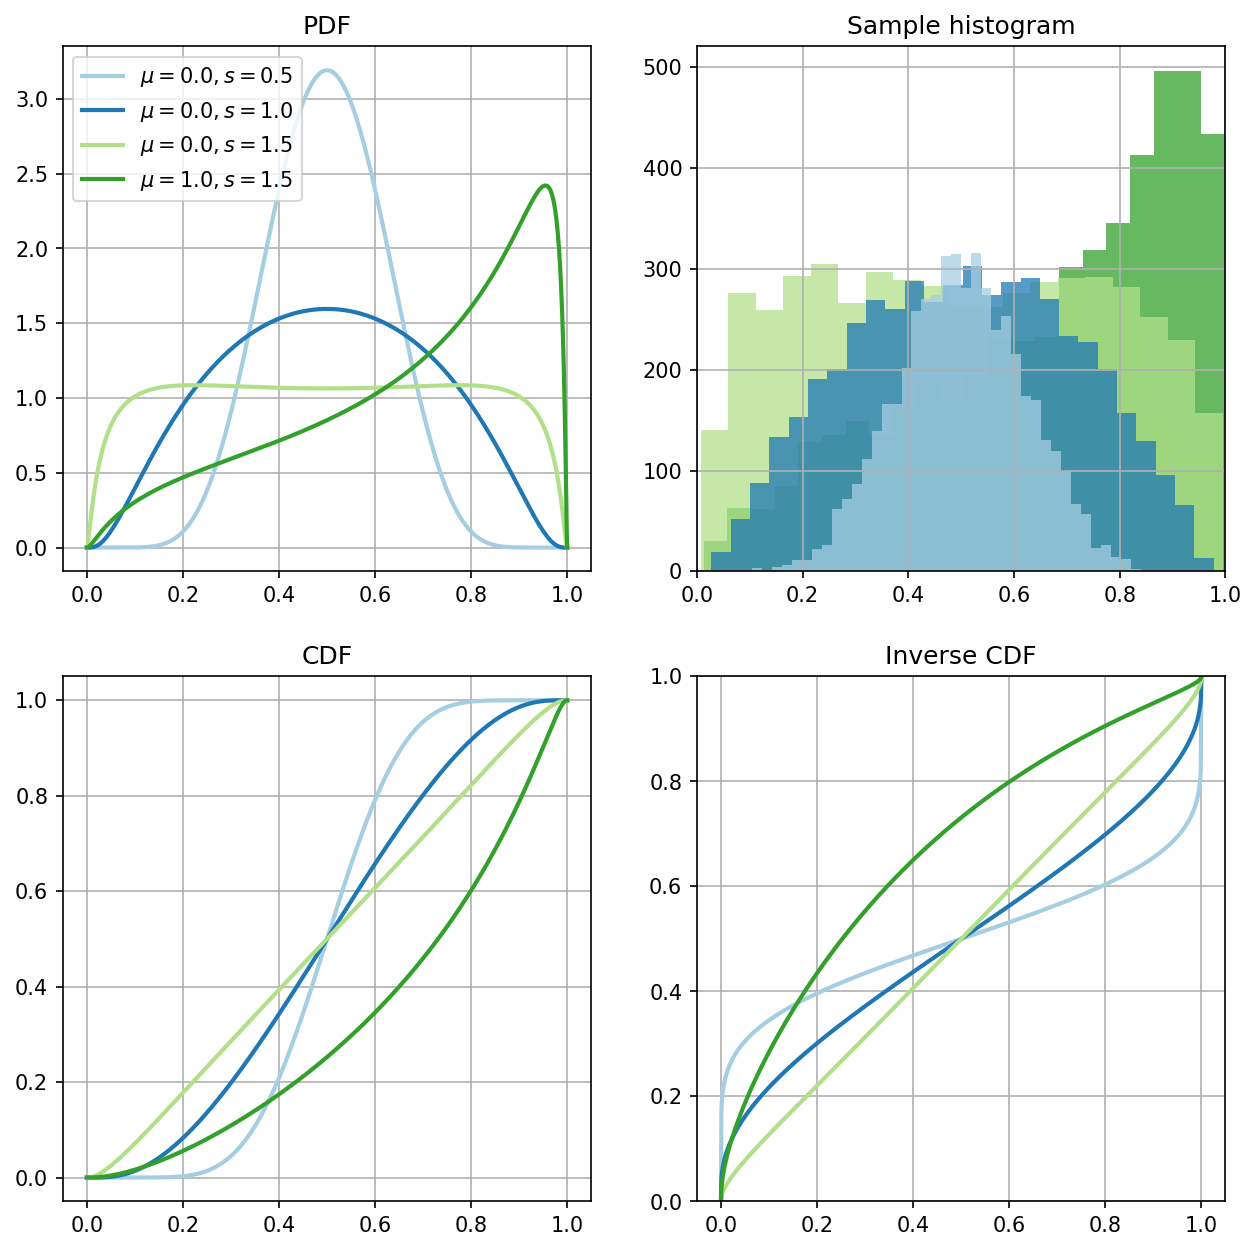

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

parameters = [[0, 0.5], [0, 1.0], [0, 1.5], [1, 1.5]]
colors = ["#a6cee3", "#1f78b4", "#b2df8a", "#33a02c"]

univ_dists = []
for parameter in parameters:
    univ_dists.append(
    uqtf.UnivDist(distribution="logitnormal", parameters=parameter)
    )

fig, axs = plt.subplots(2, 2, figsize=(10,10))

# --- PDF
xx = np.linspace(0, 1, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[0, 0].plot(
        xx,
        univ_dist.pdf(xx),
        color=colors[i],
        label=f"$\\mu = {univ_dist.parameters[0]}, s = {univ_dist.parameters[1]}$",
        linewidth=2,
    )
axs[0, 0].legend();
axs[0, 0].grid();
axs[0, 0].set_title("PDF");

# --- Sample histogram
sample_size = 5000
np.random.seed(42)
for col, univ_dist in zip(reversed(colors), reversed(univ_dists)):
    axs[0, 1].hist(
        univ_dist.get_sample(sample_size),
        color=col,
        label=f"mu = {univ_dist.parameters[0]}, beta={univ_dist.parameters[1]}",
        bins="auto",
        alpha=0.75
    )
axs[0, 1].grid();
axs[0, 1].set_xlim([0, 1]);
axs[0, 1].set_title("Sample histogram");

# --- CDF
xx = np.linspace(0, 1, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[1, 0].plot(
        xx,
        univ_dist.cdf(xx),
        color=colors[i],
        label=f"mu = {univ_dist.parameters[0]}, beta={univ_dist.parameters[1]}",
        linewidth=2,
    )
axs[1, 0].grid();
axs[1, 0].set_title("CDF");

# --- Inverse CDF
xx = np.linspace(0, 1, 1000)
for i, univ_dist in enumerate(univ_dists):
    axs[1, 1].plot(
        xx,
        univ_dist.icdf(xx),
        color=colors[i],
        label=f"mu = {univ_dist.parameters[0]}, beta={univ_dist.parameters[1]}",
        linewidth=2
    )
axs[1, 1].grid();
axs[1, 1].set_ylim([0, 1]);
axs[1, 1].set_title("Inverse CDF");

plt.gcf().set_dpi(150)